In [1]:
import pandas as pd

#Load the dataset
df = pd.read_csv('/content/retail_sales_dataset.csv')

In [2]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

#Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

#Data Cleaning: Drop duplicates
df = df.drop_duplicates()

#Data Cleaning: Convert 'Data' column to datetime format
df['Date']=pd.to_datetime(df['Date'])

First few rows of the dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Missing values in the dataset:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Number of 

In [3]:
# Calculate basic descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.00

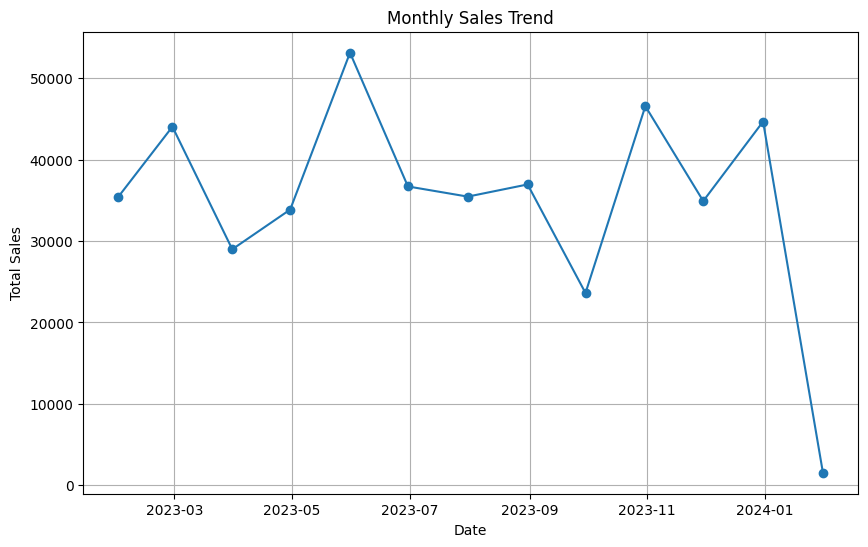

In [4]:
import matplotlib.pyplot as plt

#Set the 'Date' column as the index
df.set_index('Date', inplace=True)

#Resample the data by month and calculate total sales for each month
monthly_sales=df.resample('M').sum()

#Plot the monthly sales time series
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales['Total Amount'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [5]:
# Analyze customer demographics
print("\nCustomer demographics:")
print(df['Gender'].value_counts())
print(df['Age'].describe())

# Analyze purchasing behavior
print("\nPurchasing behavior:")
print(df['Product Category'].value_counts())
print(df.groupby('Product Category').agg({'Quantity': 'sum', 'Total Amount': 'sum'}))


Customer demographics:
Gender
Female    510
Male      490
Name: count, dtype: int64
count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64

Purchasing behavior:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64
                  Quantity  Total Amount
Product Category                        
Beauty                 771        143515
Clothing               894        155580
Electronics            849        156905


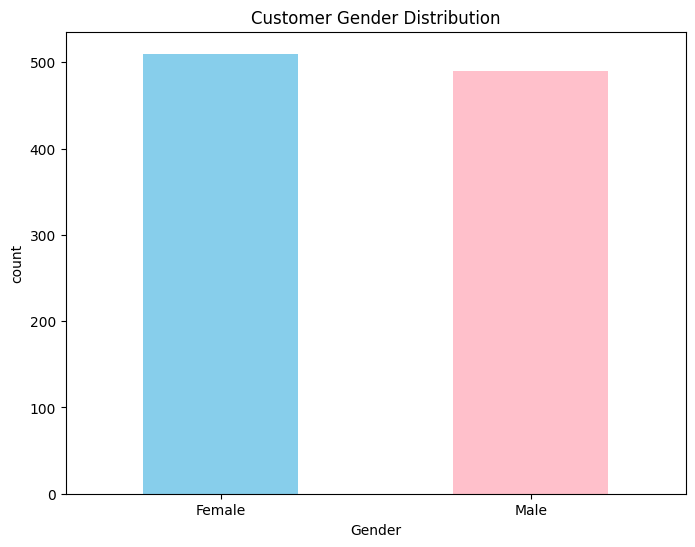

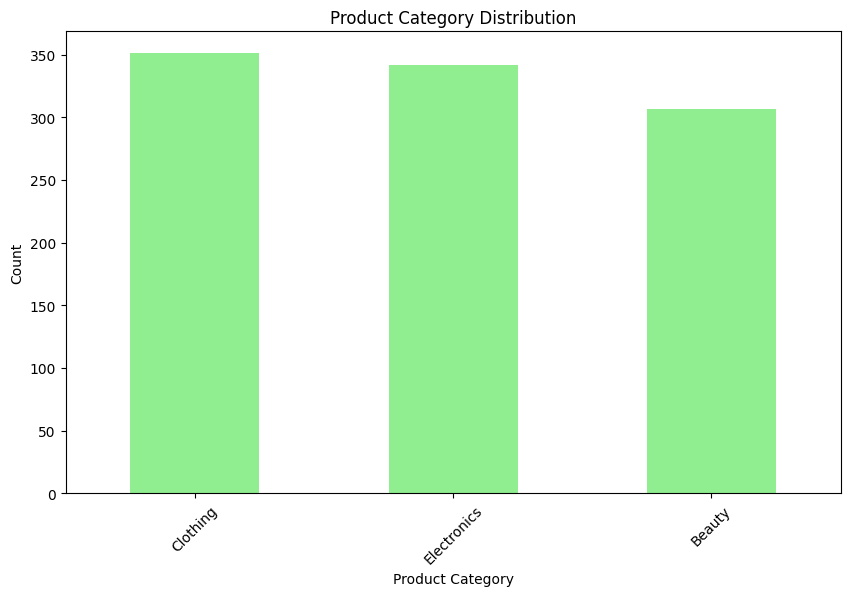

In [6]:
# Visualize customer demographics
plt.figure(figsize=(8,6))
df['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

#Visualize product categories
plt.figure(figsize=(10,6))
df['Product Category'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [7]:
# Provide Recommendations
print("\nRecommendations:")
print(" - Target marketing efforts towards the most popular product categories.")
print("- Analyze sales trends further to identify peak seasons and plan promotions accordingly.")
print("- Explore customer demographics to tailor marketing campaigns and prduct offerings.")


Recommendations:
 - Target marketing efforts towards the most popular product categories.
- Analyze sales trends further to identify peak seasons and plan promotions accordingly.
- Explore customer demographics to tailor marketing campaigns and prduct offerings.
